### Q9: Break down the total sales of items geographically (division-wise).

####     item1-> division1->total_sales

####     item1-> division2->total_sales

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [13]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.division, it.item_name, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"GROUP BY CUBE(s.division, it.item_name) "\
"ORDER BY it.item_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Division', 'ItemName', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df = df.dropna()
# df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Division,ItemName,Sales
0,RAJSHAHI,100% Juice Box Variety 6.75 oz,38730.0
1,RANGPUR,100% Juice Box Variety 6.75 oz,26685.0
2,KHULNA,100% Juice Box Variety 6.75 oz,37755.0
3,DHAKA,100% Juice Box Variety 6.75 oz,141195.0
4,CHITTAGONG,100% Juice Box Variety 6.75 oz,64950.0
...,...,...,...
2067,CHITTAGONG,Zoo Animal Cookies/Crackers,55762.0
2068,RAJSHAHI,Zoo Animal Cookies/Crackers,37100.0
2069,SYLHET,Zoo Animal Cookies/Crackers,14728.0
2070,BARISAL,Zoo Animal Cookies/Crackers,24178.0


Successfully connected to the database


Text(0, 0.5, 'Total Sales in each Division')

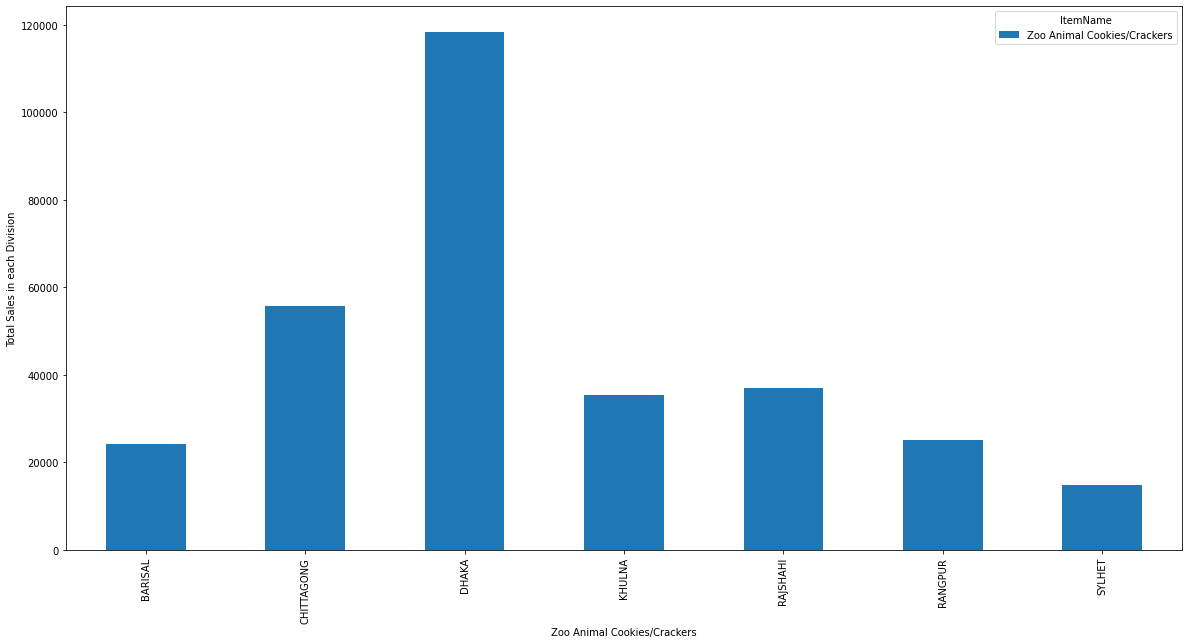

In [23]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.division, it.item_name, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"WHERE it.item_name = 'Zoo Animal Cookies/Crackers' " \
"GROUP BY CUBE(s.division, it.item_name) "\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Division', 'ItemName', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df = df.dropna()
df

df_pivot = pd.pivot_table(df, values="Sales",index="Division", columns="ItemName")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 10)

ax.set_xlabel("Zoo Animal Cookies/Crackers")
ax.set_ylabel("Total Sales in each Division")


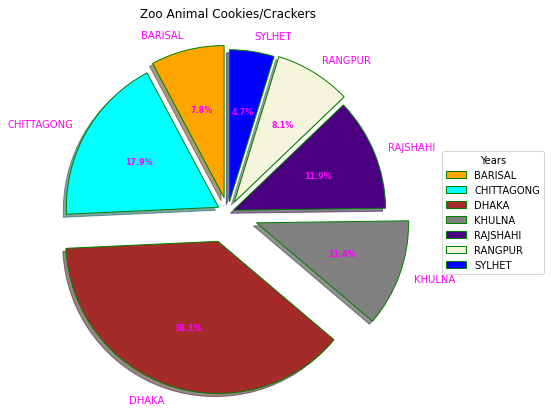

In [25]:
x=df.Division
y = df.Sales
# Creating explode data
explode = (0.1, 0.07, 0.2, 0.2, 0.04, 0.08, 0.07)

# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige", "blue")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, y),
                                  explode = explode,
                                  labels = x,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, x,
          title ="Years",
          loc ="center left",
          bbox_to_anchor =(1.05, 0, 0.8, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Zoo Animal Cookies/Crackers")

# show plot
plt.show()